<a href="https://colab.research.google.com/github/S5SAJID/deeplearning-learning-space/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;" >
<b>Bismillah-hi-Rahman-i-Raheem.</b>
<br>
<small>Starting with the name of Allah</small>
</p>

In [25]:
!git clone https://github.com/S5SAJID/deeplearning-learning-space

fatal: destination path 'deeplearning-learning-space' already exists and is not an empty directory.


## Perceptron Working
- works for linear separable data

In [ ]:
dataset = pd.read_csv("./assets/datasets/placement2.csv")
dataset.head(3)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0


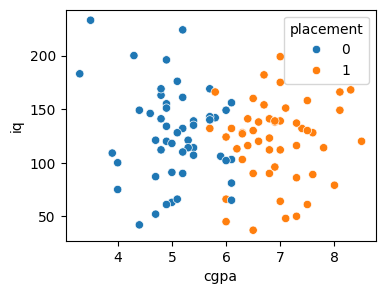

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa", y="iq", hue='placement', data=dataset)
plt.show()

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset['placement']

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data to 80% training & 20% testing subsets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=20)

In [ ]:
from sklearn.linear_model import Perceptron

pr = Perceptron()
pr.fit(x_train,y_train)

Perceptron(alpha=1)

In [ ]:
pr.score(x_test, y_test) * 100, pr.score(x_train, y_train) * 100

(70.0, 75.0)

c:\Users\s5sajid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


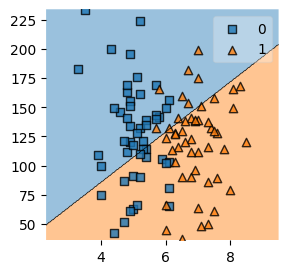

In [ ]:
plt.figure(figsize=(3,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=pr)
plt.show()

## Multi-layer perceptron & Notation (ANN)
- works also on non linear separable data which is bad for single layer perceptron.
- instead of drawing one line for prediction or classification we draw multiple lines through multiple perceptron.
- neuron 1 will be different from neural 2.
- We take all the four outputs from four neurons [if we have four neurons] and then
- send them to another perceptron, add bias, pass through activation function
- and get the output

$$∂(w^T·x + b)$$

**Note :**
- if output is two then the output layer has two output node.
- we use dot products due to the presence of matrices

  <img src="https://github.com/S5SAJID/deeplearning-learning-space/blob/main/assets/images/ann.png?raw=1" height=200 style="border-radius: 10px">
  <img src="https://github.com/S5SAJID/deeplearning-learning-space/blob/main/assets/images/layers-draw.png?raw=1" height=200 style="border-radius: 10px">

## Forward Propagation & Backward Propagation
- **Forward Propagation:** We gave input, multiply with weights, bias added, pass trough function & we get output.
    - its done from back to front.

- **Backward Propagation:**
    - **Definition :** important concept of neural network. Our task is to classify our data best. for this, we have to update the the weights of parameters and bias.
    - the initial set values for weight for a model is not best, which makes the output not accurate.
    - then we update those values to get desire outputs.
    - which is called back propagation.
    - we use gradient decent to decrease loss by adjusting weight-age & bias.

    1. We get a value and check the loss.
    2. then we go down through gradient decent from plot of w and y (output) to reach the bottom part.
    3. then on the bottom part we check the w value and set that for that particular weight.
    4. where we get very little loss and better accuracy.
    5. this works by:
        - going forward
        - checking loss
        - get w with less loss
        - set that and again check loss
        - then go back and so on
        - until we find the least loss and best accuracy.

        
    <img src="./assets/images/slp-bp.png" height=200 style="border-radius: 10px">
    <img src="./assets/images/ann-bp.png" height=200 style="border-radius: 10px">


$$GradientDecent = W_{old} - \lambda_ (\frac{dL}{dW})$$
$$Loss=\frac{1}{n}  \sum (y-w_1x_1-w_2x_2-b)^2$$


## Activation functions
- An activation function decide weather a neuron should be activated
or not.
- This means that it will decide weather the neuron's input to
the network is important or not in the process of prediction using
simpler mathematical operations.
- **Or** we can say that it transform the output value to our desire range.

**More**
- in ANN single perceptron gives there output to another and another to another...
- in between these we use activation functions

**Types**:
1. **Binary Step Function :**
    - depends on a threshold value that decides whether a neuron should be activated.
    $$f(x) = { \frac{0 for x < 0}{1 for x ≥ 0}}$$

2. **Linear Activation Function :**
    - output is not restricted in between any range
    - regression
    $$f(x) = x$$
    $$range = -∞ to ∞$$
3. **Non-linear Activation Function :**
    - These are one of the most widely used activation function.
    - It helps the model in generalizing & adopting any sort of data
    - in order to perform correct differentiation among the output.
    - **Types :**
      1. **Sigmoid / Logistic Activation Function**
            - binary output
            - curvature in from 0 to 1
            - differentiable (therefore can be used in gradient decent)
            - con: no zero centered (it's error's mean is never zero)
            $$f(x)=\frac{1}{1+e^{-x}}$$
      2. **Tanh Function (Hyperbolic Tangent)**
            - Used in RNN neural network
            - curvature from -1 to 1
            - differentiable
            - zero centered
            $$f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
      3. **ReLU Function**
            - used in hidden layer.
            - different from linear activation function.
            - follows linearity
            - also works on non-linear data
            - generally in hidden layers
            $$f(x)=max(0,x)$$
      4. Softmax Function.
            - used for categorical outputs (1,2,4,5) or (cat, dog, cow)
            - differentiable
            - used for multi-class classification
            - range not from 0 to 1 or -1 to 1
            $$softmax(z_i)=\frac{exp(z_i)}{\sum _j{exp(z_j)}}$$

**Rules For Choosing Activation Functions :**
- Regression                 ↦ Linear Activation Function
- Binary Classification      ↦ Sigmoid / Logistic Activation Function
- Multi-class Classification ↦ Softmax
- Multi-label Classification ↦ Sigmoid
- Hidden Layers              ↦ (Generally Relu)
    - Conventional Neural Network (CNN) ↦ ReLU Activation function
    - Recurrent Neural Network (RNN)    ↦ Tanh / Sigmoid / Logistic Activation Function

## Loss Function
- method of evaluating how well your algorithm is modeling your dataset.
- it is a mathematical function of the parameters of the machine learning algorithm.
- how much bad a model performs is measured in loss.
- helps parameters (weights) best value finding
- used in back propagation.
- helps in improving models by letting us know how much can we decrease loss (wrong prediction).
$$loss = y - y_(predicted)$$

### Difference in Loss VS Cost Function
- when we only find sub of y - y(predict) for single row then it is called loss. which is non-efficient.
- so we wanna find loss on all the data.
- and we then wanna know the mean of the loss.
- then that formula is called cost function.
$$Loss = (y - y_{(predicted)})$$
$$CostForMeanSquareError= \frac{(L1 + L2 + L3)^2}{3}$$


### Types:
1. Regression:
    - MSE aka (Squared Loss / L2 Loss)
      - Popular in Regression.
      - Plotting of this gives parabolic shape which make it...
      - Differentiable that's why better for gradient decent ultimately for back propagation.
      - not to use when data contains lot of outliers due to it's square nature.
    - MAE
      - due to presence of absolute the value is always positive.
      - not used that much due to its
      - Non Differentiable nature.
    - Hubber Loss
      - Considerable Outliers up to 30%
      - works on a hyper parameter.
      - Works as MSE if loss is smaller than the hyper parameter
      - Else works as Hubber Loss

          <img src="https://github.com/S5SAJID/deeplearning-learning-space/blob/main/assets/images/hubber-loss.png?raw=1" height=200 style="border-radius: 10px">

2. Classification:
    - Binary cross-entropy
      - also called log loss
      - use formula of log loss
      - if the data's output is in binary.
    - Categorical cross-entropy
      - more than binary (cat, dog, cow)
      - works on one hot encoding
      - if the categories are more than 5 then we don't use this
      - instead we use sparse categorical cross-entropy.
      - which instead of one hot encoding to label encoding like 2,3,5

3. Auto Encoder:
    - KL Divergence
4. GAN:
    - Discriminator loss
    - MinMax GAN loss
5. Object Detection:
    - Focus loss
6. Word embeddings:
    - Triplet loss

## ANN

In [27]:
dataset = pd.read_csv("deeplearning-learning-space/assets/datasets/Churn_Modelling.csv")
dataset.drop(columns=["RowNumber", "CustomerId", "Surname", "Geography", "Gender"], inplace=True)
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [28]:
x = dataset.iloc[:, :-1]
y = dataset["Exited"]

In [29]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(x)

StandardScaler()

In [30]:
x = pd.DataFrame( st.transform(x), columns=x.columns)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [32]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [88]:
from keras.layers import Dense, BatchNormalization, Activation
from keras.models import Sequential

In [89]:
from keras.callbacks import EarlyStopping

In [90]:
ann = Sequential()

In [91]:
x.shape

(10000, 8)

In [92]:
ann.add(Dense(6,input_dim=8))
ann.add(Activation("relu"))
ann.add(BatchNormalization())


ann.add(Dense(5))
ann.add(Activation("relu"))
ann.add(BatchNormalization())


ann.add(Dense(4))
ann.add(Activation("relu"))
ann.add(BatchNormalization())


ann.add(Dense(3,))
ann.add(Activation("relu"))
ann.add(Dense(2,))
ann.add(Activation("relu"))
ann.add(BatchNormalization())


ann.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
ann.compile(optimizer="adam",metrics=["accuracy"], loss="binary_crossentropy")

In [94]:
ann.fit(x_train, y_train, batch_size=100,epochs=100,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3161 - loss: 0.6937 - val_accuracy: 0.8035 - val_loss: 0.6592
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7180 - loss: 0.6585 - val_accuracy: 0.8035 - val_loss: 0.6256
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7643 - loss: 0.6216 - val_accuracy: 0.8040 - val_loss: 0.5833
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.5828 - val_accuracy: 0.7975 - val_loss: 0.5395
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.5451 - val_accuracy: 0.8005 - val_loss: 0.5000
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.5021 - val_accuracy: 0.8120 - val_loss: 0.4668
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8113 - loss: 0.4727 - val_accuracy: 0.8190 - val_loss: 0.4469
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8152 - loss: 0.4586 - val_accuracy: 0.8220 - 

In [95]:
loss, accuracy = ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3994
Test Accuracy: 83.30%


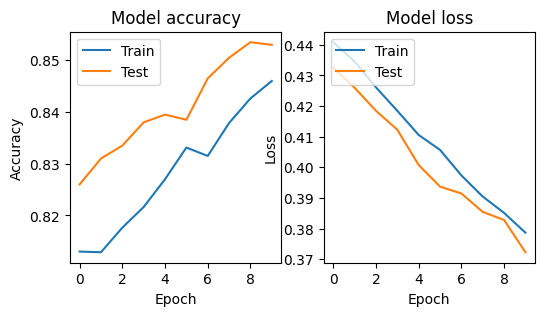

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()